# Evaluating Gene Correlations - Definitive endoderm

In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt


from moscot.problems.time._lineage import TemporalProblem

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'interpolation_parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'account_for_unbalanc

In [2]:
Path="/home/mgander/mouse_atlas/data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [3]:
ct='E7.25:Definitive endoderm'
i=7

ts0=ts[i]
ts1=ts[i+1]

In [4]:
adata=sc.read(f"{Path}/Comb_anndatas/adata_{ts0}_{ts1}.h5ad")

if 14>i>4:
    ExE_cell_types=['Embryonic visceral endoderm', 'Extraembryonic visceral endoderm', 'Parietal endoderm', 'Extraembryonic ectoderm', 'Primitive erythroid cells', 'Blood progenitors']
elif i>4:
    ExE_cell_types=['Extraembryonic visceral endoderm']
else:
    ExE_cell_types=[]
adata=adata[~adata.obs['cell_type'].isin(ExE_cell_types)].copy()
cell_indices=adata[adata.obs['day']==sorted(set(adata.obs['day']))[0]].obs.index

Only considering the two last: ['.25', '.h5ad'].
Only considering the two last: ['.25', '.h5ad'].


In [10]:
gT=np.load(f"{Path}/TOME_maps/growth_rates_and_pulls/{ts0}_{ct}_pull.npy", allow_pickle=True)
gM=pd.read_pickle(f"{Path}/moscot_maps/growth_rates_and_pulls3/{ts0}_{ct}_pulls.pkl")
gM=gM.loc[cell_indices].values

# Correlation for curated genes

The following list of genes was obtained by litarture seach when looking for genes that predict deveopment into definitive endoderm. The key in the dictionary corresponds to the citation (Pubmed ID), and the values correspond to the genes the publication lists.

Be careful, I also listed driver/marker genes if there was only moderate evidence of them being directly involved in these cell transitions, so use this list with caution!!!

In [11]:
# Definitive endoderm

D={}

D['PMID: 34988400']=['Sox17', 'Nodal', 'Inhba', 'Foxa2', 'Cdh1']

D['PMID: 30038254']=['Foxa2', 'Sox17']

D['PMID: 24973948']=['Sox17','Nanog']

D['PMID: 17387317']=['Mixl1', 'Lhx1', 'Nckap1', 'Pcsk6', 'Furin', 'Acvr2b', 'Acvr1b', 'Tdgf1', 'Rnf111',
                     'Smad2', 'Foxh1', 'Smad3', 'Amot']

D['PMID: 16752393']=['Hnf4a', 'Sox17', 'Gata4', 'Ihh', 'Afp', 'Alb', 'Foxa2', 'Nodal', 'Dkk1', 'Cer1',
                    'Irx3', 'Fgf8', 'Otx2', 'Cdx2', 'Hhex', 'Irx1']

D['PMID: 18213590']=['Cldn6', 'Shh', 'Foxa1', 'Foxa2', 'Sox17']

D['PMID: 27534536']=['Cxcr4', 'Sox17', 'Cer1', 'Eomes', 'Gata6', 'Lefty1', 'Hnf1b', 'Kit', 'Krt19', 
                     'Gata4', 'Prdm1', 'Myct1', 'Klf8']

D['PMID: 34010638']=['Gata6', 'Alb', 'Eomes', 'Sox17', 'Foxa2']

D['PMID: 17576135']=['Tmprss2', 'Plet1', 'Dsp', 'Klf5', 'Epha2']

genes=[]
for a in D.values():
    genes=[*genes, *a]

# Eliminate duplicates
genes=[a for a in set(genes)]

In [12]:
adata=sc.read(f"{Path}/Comb_anndatas/scVI_anndatas/scvi_adata_{ts0}.h5ad")
adata.var.index=list(adata.var['gene_names'])
if 14>i>4:
    ExE_cell_types=['Embryonic visceral endoderm', 'Extraembryonic visceral endoderm', 'Parietal endoderm', 'Extraembryonic ectoderm', 'Primitive erythroid cells', 'Blood progenitors']
    adata=adata[~adata.obs['cell_type'].isin(ExE_cell_types)].copy()
elif i>4:
    ExE_cell_types=['Extraembryonic visceral endoderm']
    adata=adata[~adata.obs['cell_type'].isin(ExE_cell_types)].copy()

In [13]:
hvgs=list(adata.var[adata.var['highly_variable']]['gene_names'])
genes_selected=[]
for gene in genes:
    if gene in hvgs:
        genes_selected.append(gene)

In [14]:
len(genes_selected)

36

In [15]:
len(genes)

50

In [16]:
sorted(genes_selected)

['Afp',
 'Amot',
 'Cdx2',
 'Cer1',
 'Cldn6',
 'Cxcr4',
 'Dkk1',
 'Dsp',
 'Eomes',
 'Epha2',
 'Fgf8',
 'Foxa1',
 'Foxa2',
 'Gata4',
 'Gata6',
 'Hhex',
 'Hnf1b',
 'Hnf4a',
 'Ihh',
 'Irx1',
 'Irx3',
 'Klf5',
 'Krt19',
 'Lefty1',
 'Lhx1',
 'Mixl1',
 'Nanog',
 'Nodal',
 'Otx2',
 'Pcsk6',
 'Plet1',
 'Prdm1',
 'Smad3',
 'Sox17',
 'Tdgf1',
 'Tmprss2']

In [17]:
subset=True

DF=pd.DataFrame({})

for gene in genes_selected:
    loc=adata.var.index.get_loc(gene)
    exp=adata.layers['scvi_normalized'][:,loc]
    #exp=adataS.X[:,loc]
    #exp=np.array(exp.todense()).T[0]

    if subset==True:
        wh=np.where(adata.obs['cell_state']=='E7:Anterior primitive streak')[0]
        exp=exp[wh]
        gT2=gT[wh]
        gM2=gM[wh]
    else:
        gT2=gT.copy()
        gM2=gM.copy()


    (cor, p)=scipy.stats.spearmanr(exp, gT2)
    dfT=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'TOME', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    (cor, p)=scipy.stats.spearmanr(exp, gM2)
    dfM=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'moscot', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    DF=pd.concat([DF, dfM,dfT])
DF['Abs. Correlation']=abs(DF['Correlation'])
DF.index=np.arange(len(DF))

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

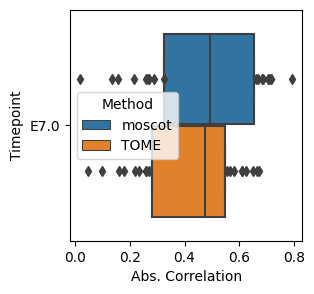

In [87]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

In [89]:
DF.to_pickle(f'{Path}/Validation_output/{ts0}_DE.npy')